<a href="https://colab.research.google.com/github/TheVioletRaven/NSE_OU/blob/master/Casus_Open_Universiteit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Notebook gemaakt door: Aukje Reina van Montfort (1704095), Silas Dannulis (2100940), Niema Mahmoudi (1807633) en Viktor Wenemoser (2101260)***

# Installatie van Anaconda en NumPy

## Anaconda package install

> Anaconda is een open-source distributie van Python voor wetenschappelijk rekenen. Het bevat veelgebruikte tools voor datawetenschap, zoals Jupyter, pandas, numpy, scikit-learn, matplotlib, en meer. Deze installatie vindt enkel plaats in het EDA notebook en dient meer als illustratie dat het gedaan moet worden voorafgaand de Jupyter Notebooks van PI7.



In [13]:
#!pip install -q condacolab
#import condacolab
#condacolab.install()

# Controle Anaconda package install en versie
#!conda --version

## Panda Numpy install

> NumPy (Numerical Python) is een fundamentele bibliotheek voor wetenschappelijk rekenen met Python. Het biedt ondersteuning voor grote, multi-dimensionale arrays en matrices, samen met een verzameling wiskundige functies om met deze arrays te werken. Wederom vindt deze installatie enkel plaats in het EDA notebook.







In [14]:
#!conda install pandas numpy matplotlib

# EDA Notebook
Eerste blik op de data

## Library imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
from sklearn.decomposition import PCA # wordt gebruikt voor dimensie reductie (data preparatie)
from sklearn.preprocessing import StandardScaler, MinMaxScaler # wordt gebruikt voor normalisatie (data preparatie)
from scipy.stats import zscore # Wordt gebruikt 2 om outliers te verwijderen (data preparatie)
from sklearn.cluster import KMeans # Voor clusteranalyse
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
import statsmodels.api as sm

## Importeren van de csv file

**Belangrijke informatie NSE dataset:**

De dataset is in week 7 van blokperiode 4 geleverd door Mattie Hermans van de Open Universiteit te Heerlen. Gevoelige informatie staat aangekaart middels een negatief cijfer (zoals -4) en de data is mede interpreteerbaar middels het "NSE2024_Bestandsbeschrijving_definitief_Instellingsbestand.xlsx."


> *Notitie: De datasets kan worden ingeladen middels Google Colab óf middels een tool zoals Visual Studio Code, vandaar het tweetal codeblocks om de data in te laden.*

In [16]:
from google.colab import drive
drive.mount('/content/drive')

# Pad naar de datasets
NSE_bestand_OU = "/content/drive/MyDrive/Colab Notebooks/Dataset/NSE_Instellingsbestand_2024.csv"
df = pd.read_csv(NSE_bestand_OU, delimiter=';', skiprows=4)

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# Laad het Excel-bestand
file_path = 'Kopie van NSE Instellingsbestand 2024.xlsx'
df = pd.read_excel(file_path, sheet_name='NSE Instellingsbestand 2024')

# verwijder rijen met negatieve waarden
df = df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# Definieer kolommen om te verwijderen
columns_to_drop = df.columns[df.isnull().sum() >= (len(df) - 1000)].tolist()
columns_to_drop.extend(['BrinActueel', 'Brin', 'BrinNaamActueel', 'BrinNaam', 'CrohoActueel', 'Croho', 'CrohoNaam', 'Locatie', 'CrohoSector', 'Responsdatum', 'UniekNummer'])

# print kolommen die verwijderd worden 
print(f"Kolommen die worden verwijderd: {columns_to_drop}") 

# verwijder kolommen
df = df.drop(columns_to_drop, axis=1) 

# Vervang lege velden door 'NaN'
df = df.fillna(np.nan)

# Converteer categorische kolommen naar dummy variabelen
df = pd.get_dummies(df, columns=['CrohoNaamActueel', 'CrohoSectorNaam'], drop_first=True)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean') 
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Selecteer numerieke kolommen voor schaling
numerical_columns = df_imputed.select_dtypes(include=[np.number]).columns

# Normaliseer de numerieke data met MinMaxScaler
scaler = MinMaxScaler()
df_imputed[numerical_columns] = scaler.fit_transform(df_imputed[numerical_columns])

# Sla de geschaalde DataFrame op in een nieuw CSV-bestand
df_imputed.to_csv('NSE_Instellingsbestand_scaled.csv', index=False)

columns = df_imputed.columns.to_list() 

print (f'kolomnamen: {columns}')

# Toon de eerste paar rijen van de geschaalde DataFrame
print(df_imputed.head())

C:\Users\sdann\AppData\Local\Temp\ipykernel_4308\1389202245.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)


Kolommen die worden verwijderd: ['Gemeentecode', 'Stedelijkheid', 'Landsdeel', 'Leerroute_track', 'Label1', 'Label2', 'Label3', 'Label4', 'Label5', 'Label6', 'Label7', 'Kunstopleiding', 'Hoofdopleiding', 'Geslacht', 'Leeftijd', 'StudiejaarStudent', 'Vooropleiding', 'Woonsituatie', 'TEVREDENHEIDALGEMEEN_04', 'ONDERSTEUNING_02_ADHD', 'ONDERSTEUNING_02_AUTISME', 'ONDERSTEUNING_02_DYSLEXIE', 'ONDERSTEUNING_02_CHRONISCH', 'ONDERSTEUNING_02_PSYCHISCH', 'ONDERSTEUNING_02_VISUEELAUDITIEF', 'ONDERSTEUNING_02_MOTORISCH', 'ONDERSTEUNING_02_HERSTEL', 'ONDERSTEUNING_02_TOPSPORT', 'ONDERSTEUNING_02_ONDERNEMERSCHAP', 'ONDERSTEUNING_02_FAMILIE', 'ONDERSTEUNING_02_PERSOONLIJK', 'ONDERSTEUNING_02_ANDERS', 'ONDERSTEUNING_03_TOETS_ADHD', 'ONDERSTEUNING_03_TOETS_AUTISME', 'ONDERSTEUNING_03_TOETS_DYSLEXIE', 'ONDERSTEUNING_03_TOETS_CHRONISCH', 'ONDERSTEUNING_03_TOETS_PSYCHISCH', 'ONDERSTEUNING_03_TOETS_VISUEELAUDITIEF', 'ONDERSTEUNING_03_TOETS_MOTORISCH', 'ONDERSTEUNING_03_TOETS_HERSTEL', 'ONDERSTEUNING_03_T

> Indien scaled instellingsbestand al bestaat, hoeft enkel onderstaande codeblock te worden gebruikt.

In [3]:
df = 'NSE_Instellingsbestand_scaled.csv'

# Laad datasets
df_imputed = pd.read_csv('NSE_Instellingsbestand_scaled.csv')

print(df_imputed)

      Jaar  Weegfactor  BrinvolgnummerActueel  BrinVolgnummer  SoortHo  BaMa  \
0      1.0    0.711201                    0.0             0.0      0.0   0.0   
1      1.0    0.711201                    0.0             0.0      0.0   0.0   
2      1.0    0.711201                    0.0             0.0      0.0   0.0   
3      1.0    0.711201                    0.0             0.0      0.0   0.0   
4      1.0    0.711201                    0.0             0.0      0.0   0.0   
...    ...         ...                    ...             ...      ...   ...   
6241   0.5    0.215514                    0.0             0.0      0.0   1.0   
6242   0.5    0.215514                    0.0             0.0      0.0   1.0   
6243   0.5    0.215514                    0.0             0.0      0.0   1.0   
6244   0.5    0.215514                    0.0             0.0      0.0   1.0   
6245   0.5    0.215514                    0.0             0.0      0.0   1.0   

      Fixus  Decentraal  Bekostiging  O

In [4]:
# Print een gedeelte van de data om de structuur te verifiëren
print("\nData Sample:")
print(df_imputed.head())


Data Sample:
   Jaar  Weegfactor  BrinvolgnummerActueel  BrinVolgnummer  SoortHo  BaMa  \
0   1.0    0.711201                    0.0             0.0      0.0   0.0   
1   1.0    0.711201                    0.0             0.0      0.0   0.0   
2   1.0    0.711201                    0.0             0.0      0.0   0.0   
3   1.0    0.711201                    0.0             0.0      0.0   0.0   
4   1.0    0.711201                    0.0             0.0      0.0   0.0   

   Fixus  Decentraal  Bekostiging  Opleidingsvorm3  ...  \
0    0.0         0.0          0.0              0.0  ...   
1    0.0         0.0          0.0              0.0  ...   
2    0.0         0.0          0.0              0.0  ...   
3    0.0         0.0          0.0              0.0  ...   
4    0.0         0.0          0.0              0.0  ...   

   CrohoNaamActueel_M Onderwijswetenschappen  CrohoNaamActueel_M Psychology  \
0                                        0.0                            0.0   
1         

In [5]:
# Functie om statistieken te berekenen
def calculate_stats(column):
    return [
        column.var(),
        column.std(),
        column.mean(),
        column.median(),
        column.mode()[0] if not column.mode().empty else None
    ]

# Selecteer numerieke kolommen
numeric_columns = df_imputed.select_dtypes(include=['number']).columns.tolist()
print("\nNumeric Columns:", numeric_columns)


Numeric Columns: ['Jaar', 'Weegfactor', 'BrinvolgnummerActueel', 'BrinVolgnummer', 'SoortHo', 'BaMa', 'Fixus', 'Decentraal', 'Bekostiging', 'Opleidingsvorm3', 'Opleidingsvorm2', 'TypeStudent', 'Afstandsonderwijs', 'Internationale_Student', 'studiejaar', 'TEVREDENHEIDALGEMEEN_01', 'TEVREDENHEIDALGEMEEN_02', 'TEVREDENHEIDALGEMEEN_03', 'TEVREDENHEIDALGEMEEN_05', 'TEVREDENHEIDALGEMEEN_06', 'TEVREDENHEIDALGEMEEN_07', 'TEVREDENHEIDALGEMEEN_08', 'TEVREDENHEIDALGEMEEN_09', 'TEVREDENHEIDALGEMEEN_10', 'TEVREDENHEIDALGEMEEN_11', 'TEVREDENHEIDALGEMEEN_12', 'OPNIEUWKIEZEN', 'INHOUDOPZET_THEMA', 'INHOUDOPZET_01', 'INHOUDOPZET_02', 'INHOUDOPZET_03', 'INHOUDOPZET_04', 'INHOUDOPZET_05', 'INHOUDOPZET_06', 'INHOUDOPZET_07', 'INHOUDOPZET_08', 'STUDIEDRUK_01', 'AANSLUITING_THEMA', 'AANSLUITING_01', 'AANSLUITING_02', 'DOCENTEN_THEMA', 'DOCENTEN_01', 'DOCENTEN_02', 'DOCENTEN_03', 'DOCENTEN_04', 'DOCENTEN_05', 'DOCENTEN_06', 'DOCENTEN_07', 'DOCENTEN_08', 'ENGELS_01', 'BEGELEIDING_SELECTIE', 'BEGELEIDING_THEM

## Data analyse 

Vervolgens is de Seaborn library toegepast om een spreidingstabel matrix aan te maken. Deze matrix maakt het makkelijker om de correlaties te visualiseren door een grid van plots te maken. De Seaborn library is ook sneller dan de matplotlibrary omdat matplotlibrary elke grid zelf moet invullen. 

In [8]:
# Sample the data (e.g., 5% of the original data)
sampled_df = df_imputed.sample(frac=0.05, random_state=42)

sns.set_theme(style="ticks")
sns.pairplot(sampled_df)

# bron: https://seaborn.pydata.org/examples/scatterplot_matrix.html

**Observaties:**

*   Uit deze spreidingtabel matrix bleek dat de dataset te groot is om middels dit soort spreidingstabel in te zien. Daarom wordt de volgende code toegepast:

### Regressieanalyse 

Om de relatie tussen verschillende onafhankelijke variabelen en de belangrijkste target variabelen (tevredenheid en vaardigheden) te onderzoeken, is er een regressieanalyse uitgevoerd. Voor elke tevredenheidsvariabele wordt een apart regressiemodel getraind en de resultaten zoals `R-kwadraat` (statistische maat die aangeeft hoe goed een model de variatie in de afhankelijke variabele verklaart. Het is een getal tussen 0 en 1), `beta-coëfficiënten` (geschatte waarde die aangeeft hoeveel de afhankelijke variabele verandert als de onafhankelijke variabele met één eenheid toeneemt) en `p-waarden` (waarschijnlijkheid dat de geobserveerde relatie tussen de onafhankelijke en afhankelijke variabele op toeval berust.) worden opgeslagen. Deze resultaten worden vervolgens gevisualiseerd om de invloed van verschillende variabelen op tevredenheid te begrijpen.

    Tevredenheidsvariabele    Onafhankelijke Variabele  R-kwadraat  \
0    Algemene Tevredenheid           INHOUDOPZET_THEMA    0.455548   
1    Algemene Tevredenheid           AANSLUITING_THEMA    0.455548   
2    Algemene Tevredenheid              DOCENTEN_THEMA    0.455548   
3    Algemene Tevredenheid           BEGELEIDING_THEMA    0.455548   
4    Algemene Tevredenheid   TOETSINGBEOORDELING_THEMA    0.455548   
..                     ...                         ...         ...   
105  Sfeer op de opleiding  BETROKKENHEIDCONTACT_THEMA    0.338739   
106  Sfeer op de opleiding               STUDIEDRUK_01    0.338739   
107  Sfeer op de opleiding          VAARDIGHEDEN_THEMA    0.338739   
108  Sfeer op de opleiding            STUDIELAST_THEMA    0.338739   
109  Sfeer op de opleiding    STUDIEFACILITEITEN_THEMA    0.338739   

     Beta-coëfficiënt       p-waarde  
0            0.563819  6.598034e-149  
1            0.001495   9.040056e-01  
2            0.125434   3.709111e-11  
3  

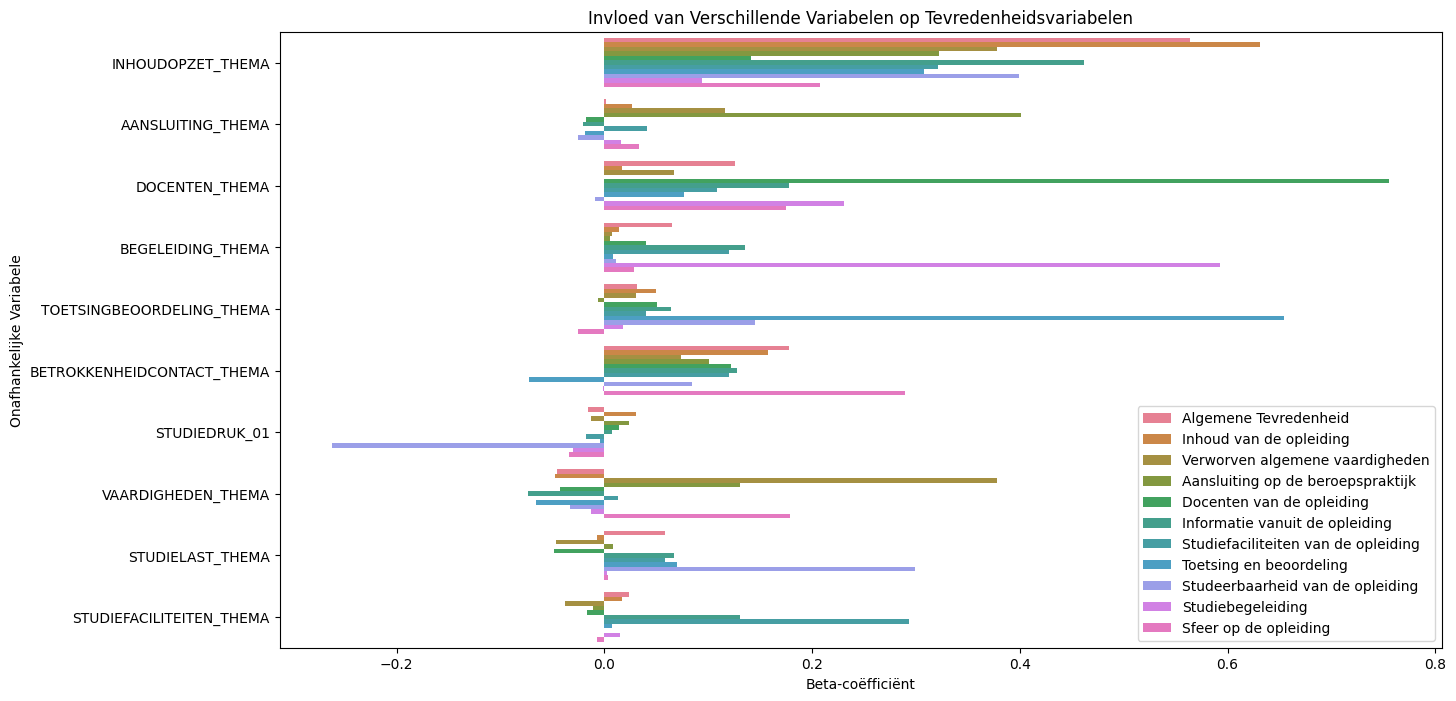

In [16]:


# Mapping van originele kolomnamen naar duidelijkere namen
column_mapping = {
    'TEVREDENHEIDALGEMEEN_01': 'Algemene Tevredenheid',
    'TEVREDENHEIDALGEMEEN_02': 'Inhoud van de opleiding',
    'TEVREDENHEIDALGEMEEN_03': 'Verworven algemene vaardigheden',
    'TEVREDENHEIDALGEMEEN_05': 'Aansluiting op de beroepspraktijk',
    'TEVREDENHEIDALGEMEEN_06': 'Docenten van de opleiding',
    'TEVREDENHEIDALGEMEEN_07': 'Informatie vanuit de opleiding',
    'TEVREDENHEIDALGEMEEN_08': 'Studiefaciliteiten van de opleiding',
    'TEVREDENHEIDALGEMEEN_09': 'Toetsing en beoordeling',
    'TEVREDENHEIDALGEMEEN_10': 'Studeerbaarheid van de opleiding',
    'TEVREDENHEIDALGEMEEN_11': 'Studiebegeleiding',
    'TEVREDENHEIDALGEMEEN_12': 'Sfeer op de opleiding',
}

# Selecteer de tevredenheidsvariabelen met duidelijkere namen
tevredenheid_columns = list(column_mapping.keys())

# Selecteer de relevante onafhankelijke variabelen
onafhankelijke_variabelen = [
    'INHOUDOPZET_THEMA', 'AANSLUITING_THEMA', 'DOCENTEN_THEMA', 'BEGELEIDING_THEMA', 
    'TOETSINGBEOORDELING_THEMA', 'BETROKKENHEIDCONTACT_THEMA', 'STUDIEDRUK_01', 
    'VAARDIGHEDEN_THEMA', 'STUDIELAST_THEMA', 'STUDIEFACILITEITEN_THEMA'
]

# Resultaten opslaan
regressie_resultaten = []

# Voer regressieanalyse uit voor elke tevredenheidsvariabele
for column in tevredenheid_columns:
    X = df_imputed[onafhankelijke_variabelen]
    y = df_imputed[column]
    
    # Voeg een constante toe aan het model (intercept)
    X = sm.add_constant(X)
    
    # Voer de regressieanalyse uit
    model = sm.OLS(y, X).fit()
    
    # Voeg de resultaten toe aan de lijst
    for var in onafhankelijke_variabelen:
        regressie_resultaten.append((column_mapping[column], var, model.rsquared, model.params[var], model.pvalues[var]))

# Resultaten omzetten naar een DataFrame voor overzichtelijkheid
resultaten_df = pd.DataFrame(regressie_resultaten, columns=['Tevredenheidsvariabele', 'Onafhankelijke Variabele', 'R-kwadraat', 'Beta-coëfficiënt', 'p-waarde'])

# Toon de resultaten
print(resultaten_df)

# Visualiseer de beta-coëfficiënten van de regressieanalyse
plt.figure(figsize=(15, 8))
sns.barplot(x='Beta-coëfficiënt', y='Onafhankelijke Variabele', hue='Tevredenheidsvariabele', data=resultaten_df)
plt.title('Invloed van Verschillende Variabelen op Tevredenheidsvariabelen')
plt.xlabel('Beta-coëfficiënt')
plt.ylabel('Onafhankelijke Variabele')
plt.legend(loc='best')
plt.show()


### Random Forest Feature Importance

Om een nog completer beeld van de relaties in de data te verkrijgen,, wordt een Random Forest model getraind. Het model helpt bij het identificeren van niet-lineaire relaties en interacties, het biedt robuustere inschattingen bij multicollineariteit en geeft een duidelijke rangorde van de belangrijkste kenmerken

Feature ranking for Algemene Tevredenheid:
1. feature INHOUDOPZET_THEMA (0.43145962643325325)
2. feature DOCENTEN_THEMA (0.09786016780939)
3. feature BETROKKENHEIDCONTACT_THEMA (0.09722627495122627)
4. feature STUDIELAST_THEMA (0.07347905738390738)
5. feature TOETSINGBEOORDELING_THEMA (0.07333898358639677)
6. feature VAARDIGHEDEN_THEMA (0.061619775830513576)
7. feature STUDIEFACILITEITEN_THEMA (0.051504230560402986)
8. feature AANSLUITING_THEMA (0.05014464405644998)
9. feature BEGELEIDING_THEMA (0.049218633019172384)
10. feature STUDIEDRUK_01 (0.0141486063692875)


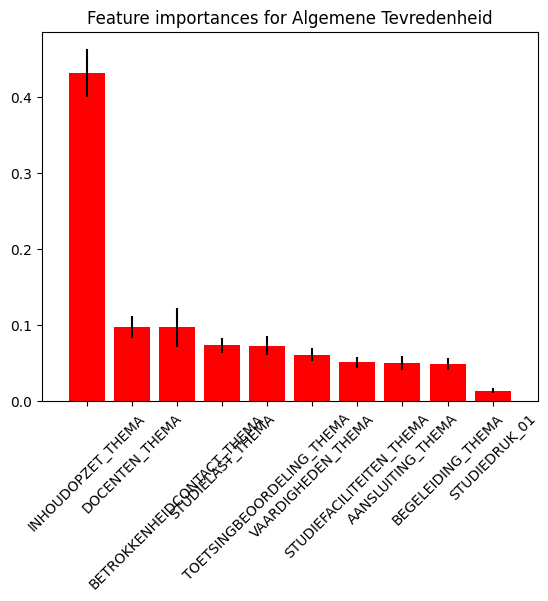

Feature ranking for Inhoud van de opleiding:
1. feature INHOUDOPZET_THEMA (0.45591171640834327)
2. feature BETROKKENHEIDCONTACT_THEMA (0.08069859119671667)
3. feature DOCENTEN_THEMA (0.08029747066236644)
4. feature STUDIELAST_THEMA (0.07125614335218622)
5. feature VAARDIGHEDEN_THEMA (0.07009543741864344)
6. feature TOETSINGBEOORDELING_THEMA (0.06744414835231959)
7. feature STUDIEFACILITEITEN_THEMA (0.056329712040616056)
8. feature AANSLUITING_THEMA (0.05247679330148897)
9. feature BEGELEIDING_THEMA (0.04657075475237735)
10. feature STUDIEDRUK_01 (0.018919232514941937)


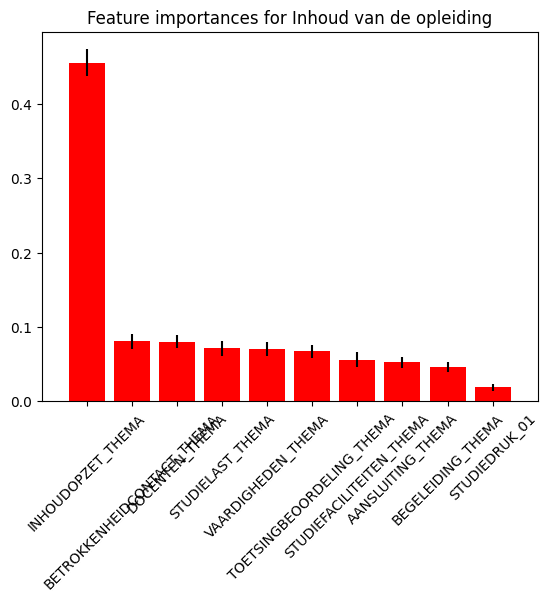

Feature ranking for Verworven algemene vaardigheden:
1. feature VAARDIGHEDEN_THEMA (0.2586455346343258)
2. feature INHOUDOPZET_THEMA (0.21460405480421368)
3. feature DOCENTEN_THEMA (0.0927184302969794)
4. feature BETROKKENHEIDCONTACT_THEMA (0.08697869545381538)
5. feature TOETSINGBEOORDELING_THEMA (0.07752343692936843)
6. feature STUDIELAST_THEMA (0.07630473859046402)
7. feature AANSLUITING_THEMA (0.06505986046780839)
8. feature STUDIEFACILITEITEN_THEMA (0.06001529777290418)
9. feature BEGELEIDING_THEMA (0.048936858132708844)
10. feature STUDIEDRUK_01 (0.019213092917411672)


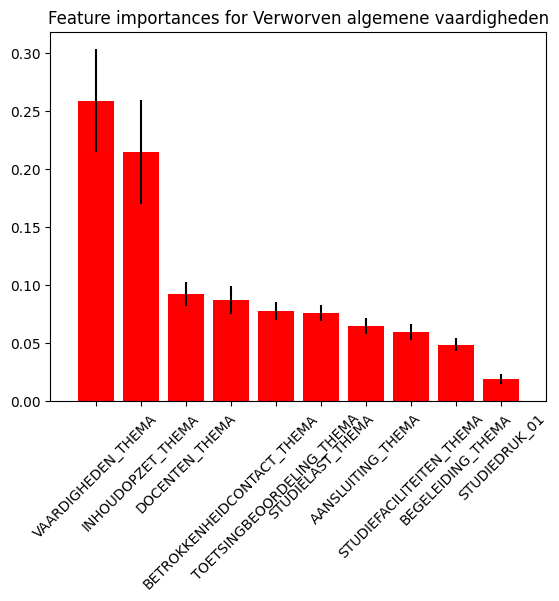

Feature ranking for Aansluiting op de beroepspraktijk:
1. feature AANSLUITING_THEMA (0.28432428976357843)
2. feature INHOUDOPZET_THEMA (0.19147822686916122)
3. feature DOCENTEN_THEMA (0.08750365782583783)
4. feature VAARDIGHEDEN_THEMA (0.08217268824925028)
5. feature BETROKKENHEIDCONTACT_THEMA (0.08061239417855137)
6. feature STUDIELAST_THEMA (0.07843244653319692)
7. feature TOETSINGBEOORDELING_THEMA (0.0701613420556019)
8. feature STUDIEFACILITEITEN_THEMA (0.059103175805757927)
9. feature BEGELEIDING_THEMA (0.04681549542242484)
10. feature STUDIEDRUK_01 (0.01939628329663943)


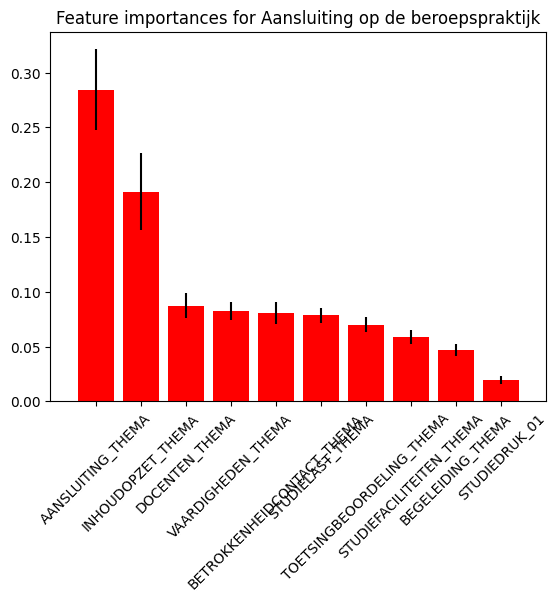

Feature ranking for Docenten van de opleiding:
1. feature DOCENTEN_THEMA (0.5955860395349895)
2. feature INHOUDOPZET_THEMA (0.06164127817346623)
3. feature BETROKKENHEIDCONTACT_THEMA (0.06103966224270179)
4. feature STUDIELAST_THEMA (0.05247827359521281)
5. feature TOETSINGBEOORDELING_THEMA (0.05195102932262949)
6. feature VAARDIGHEDEN_THEMA (0.05080882478455424)
7. feature STUDIEFACILITEITEN_THEMA (0.040422832395901144)
8. feature AANSLUITING_THEMA (0.03964174234275047)
9. feature BEGELEIDING_THEMA (0.0330398873049991)
10. feature STUDIEDRUK_01 (0.013390430302795372)


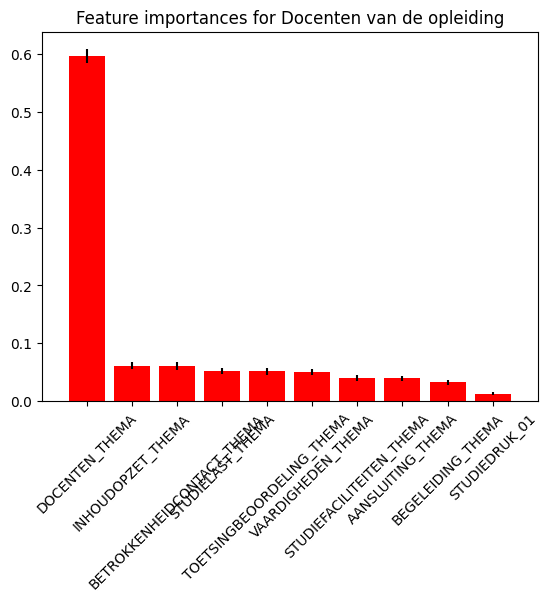

Feature ranking for Informatie vanuit de opleiding:
1. feature INHOUDOPZET_THEMA (0.3523044510394365)
2. feature DOCENTEN_THEMA (0.12851376941193257)
3. feature BETROKKENHEIDCONTACT_THEMA (0.11005999514408334)
4. feature TOETSINGBEOORDELING_THEMA (0.07557751768148477)
5. feature STUDIELAST_THEMA (0.07273295372094976)
6. feature VAARDIGHEDEN_THEMA (0.07134422211871129)
7. feature STUDIEFACILITEITEN_THEMA (0.06087408934973678)
8. feature AANSLUITING_THEMA (0.05544515354051193)
9. feature BEGELEIDING_THEMA (0.05465200737905926)
10. feature STUDIEDRUK_01 (0.018495840614093824)


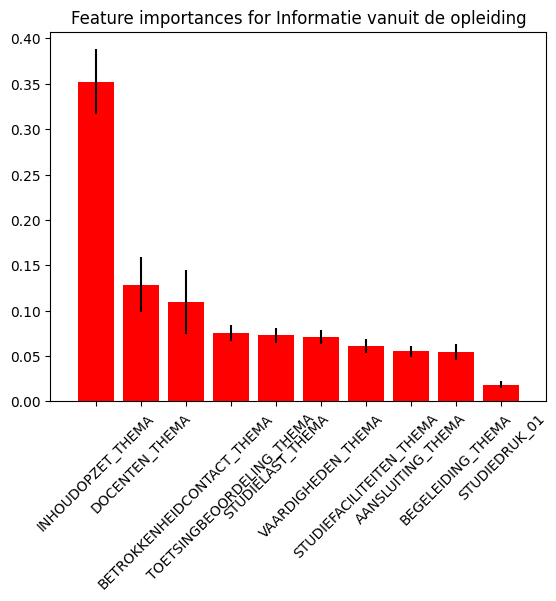

Feature ranking for Studiefaciliteiten van de opleiding:
1. feature INHOUDOPZET_THEMA (0.26431017654055916)
2. feature BETROKKENHEIDCONTACT_THEMA (0.12695245259606475)
3. feature DOCENTEN_THEMA (0.10910944229392201)
4. feature STUDIEFACILITEITEN_THEMA (0.10226401701035576)
5. feature TOETSINGBEOORDELING_THEMA (0.084591912795807)
6. feature STUDIELAST_THEMA (0.08312258468101098)
7. feature VAARDIGHEDEN_THEMA (0.08206709245088477)
8. feature BEGELEIDING_THEMA (0.06412906343738234)
9. feature AANSLUITING_THEMA (0.06257793858356468)
10. feature STUDIEDRUK_01 (0.020875319610448684)


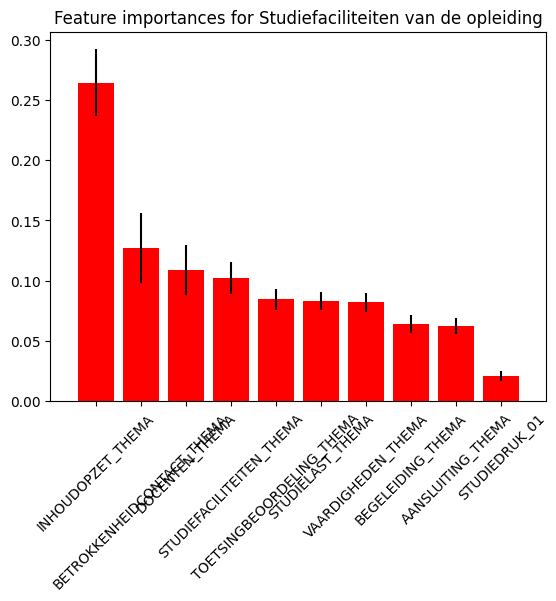

Feature ranking for Toetsing en beoordeling:
1. feature TOETSINGBEOORDELING_THEMA (0.4973721107658114)
2. feature INHOUDOPZET_THEMA (0.08988919829575934)
3. feature DOCENTEN_THEMA (0.07343351212873395)
4. feature BETROKKENHEIDCONTACT_THEMA (0.06372296255923122)
5. feature STUDIELAST_THEMA (0.0634432540454833)
6. feature VAARDIGHEDEN_THEMA (0.062436826033510966)
7. feature STUDIEFACILITEITEN_THEMA (0.04876272442448912)
8. feature AANSLUITING_THEMA (0.04484892806562829)
9. feature BEGELEIDING_THEMA (0.036565090661341185)
10. feature STUDIEDRUK_01 (0.019525393020011165)


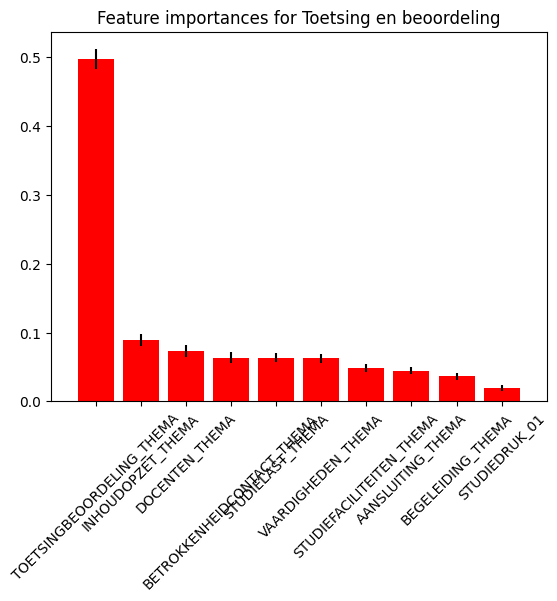

Feature ranking for Studeerbaarheid van de opleiding:
1. feature STUDIELAST_THEMA (0.3250063856599542)
2. feature INHOUDOPZET_THEMA (0.16248293760210888)
3. feature TOETSINGBEOORDELING_THEMA (0.10696026560379593)
4. feature BETROKKENHEIDCONTACT_THEMA (0.07623880759646104)
5. feature DOCENTEN_THEMA (0.07394744219350183)
6. feature VAARDIGHEDEN_THEMA (0.0686771223636766)
7. feature STUDIEFACILITEITEN_THEMA (0.04912136185010356)
8. feature AANSLUITING_THEMA (0.04849467901557044)
9. feature BEGELEIDING_THEMA (0.044743113161524434)
10. feature STUDIEDRUK_01 (0.04432788495330317)


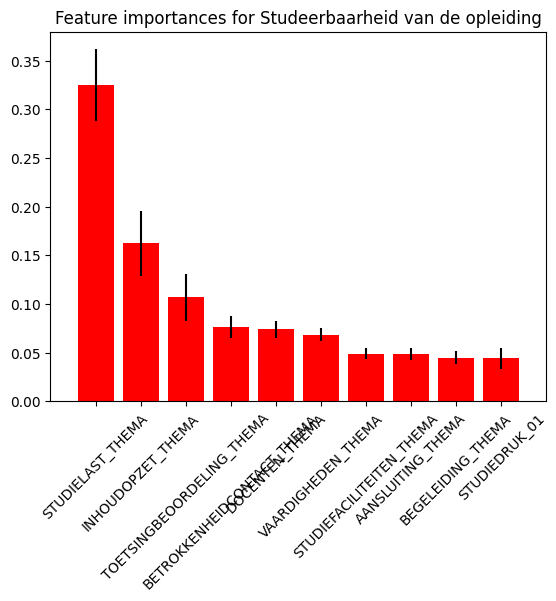

Feature ranking for Studiebegeleiding:
1. feature BEGELEIDING_THEMA (0.44161739433989794)
2. feature DOCENTEN_THEMA (0.11900915832748227)
3. feature BETROKKENHEIDCONTACT_THEMA (0.07628131861106945)
4. feature INHOUDOPZET_THEMA (0.07060452642643714)
5. feature TOETSINGBEOORDELING_THEMA (0.06179606729544207)
6. feature STUDIELAST_THEMA (0.06088785010956004)
7. feature VAARDIGHEDEN_THEMA (0.0582673521423721)
8. feature AANSLUITING_THEMA (0.048271479112111604)
9. feature STUDIEFACILITEITEN_THEMA (0.04568521206874622)
10. feature STUDIEDRUK_01 (0.017579641566881257)


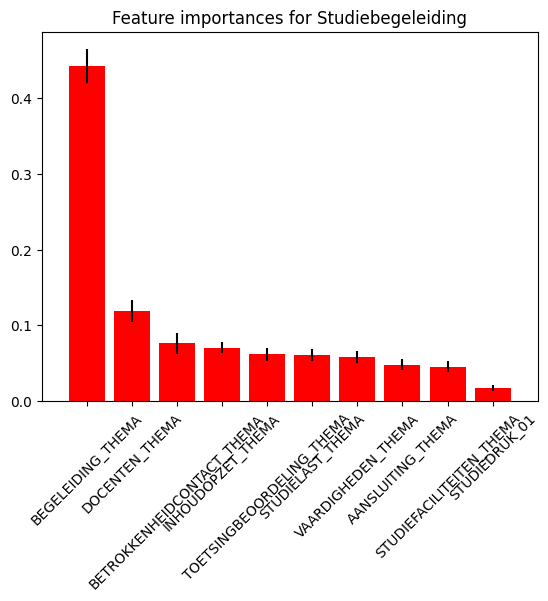

Feature ranking for Sfeer op de opleiding:
1. feature DOCENTEN_THEMA (0.2541542238318877)
2. feature BETROKKENHEIDCONTACT_THEMA (0.1605135760513715)
3. feature INHOUDOPZET_THEMA (0.12125714649140779)
4. feature VAARDIGHEDEN_THEMA (0.09174540625677025)
5. feature STUDIELAST_THEMA (0.08352977539074986)
6. feature TOETSINGBEOORDELING_THEMA (0.08165455543981003)
7. feature AANSLUITING_THEMA (0.06666395641434375)
8. feature STUDIEFACILITEITEN_THEMA (0.06409126070034213)
9. feature BEGELEIDING_THEMA (0.05340726089246158)
10. feature STUDIEDRUK_01 (0.022982838530855445)


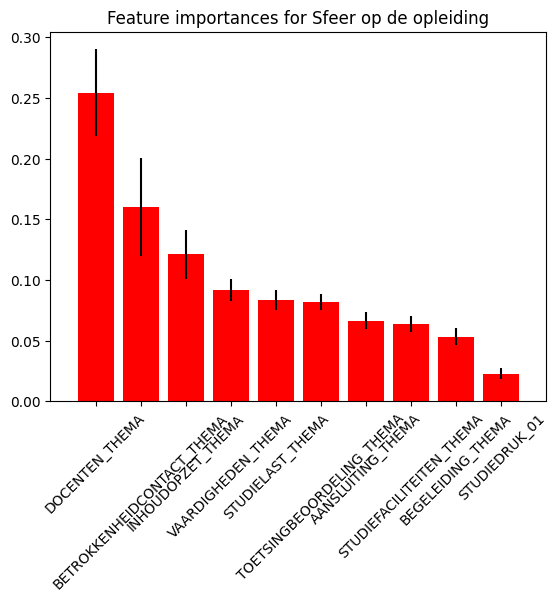

In [18]:
X = df_imputed[onafhankelijke_variabelen]
y = df_imputed[tevredenheid_columns]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train het multi-output Random Forest model
rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf.fit(X_train, y_train)

for i, target_name in enumerate(tevredenheid_columns):
    importances = rf.estimators_[i].feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_[i].estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    # Print de feature ranking met duidelijke namen
    print(f"Feature ranking for {column_mapping[target_name]}:")

    for f in range(X.shape[1]):
        print(f"{f + 1}. feature {onafhankelijke_variabelen[indices[f]]} ({importances[indices[f]]})")

    # Plot de feature importances met duidelijke namen
    plt.figure()
    plt.title(f"Feature importances for {column_mapping[target_name]}")
    plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), [onafhankelijke_variabelen[i] for i in indices], rotation=45)
    plt.xlim([-1, X.shape[1]])
    plt.show()

   Vaardigheidsvariabele    Onafhankelijke Variabele  R-kwadraat  \
0     VAARDIGHEDEN_THEMA           INHOUDOPZET_THEMA    0.506230   
1     VAARDIGHEDEN_THEMA           AANSLUITING_THEMA    0.506230   
2     VAARDIGHEDEN_THEMA              DOCENTEN_THEMA    0.506230   
3     VAARDIGHEDEN_THEMA           BEGELEIDING_THEMA    0.506230   
4     VAARDIGHEDEN_THEMA   TOETSINGBEOORDELING_THEMA    0.506230   
..                   ...                         ...         ...   
58       VAARDIGHEDEN_06   TOETSINGBEOORDELING_THEMA    0.340427   
59       VAARDIGHEDEN_06  BETROKKENHEIDCONTACT_THEMA    0.340427   
60       VAARDIGHEDEN_06               STUDIEDRUK_01    0.340427   
61       VAARDIGHEDEN_06            STUDIELAST_THEMA    0.340427   
62       VAARDIGHEDEN_06    STUDIEFACILITEITEN_THEMA    0.340427   

    Beta-coëfficiënt      p-waarde  
0           0.135709  3.926711e-18  
1           0.089735  1.315812e-22  
2           0.146317  1.429537e-25  
3           0.021703  2.570574e-02 

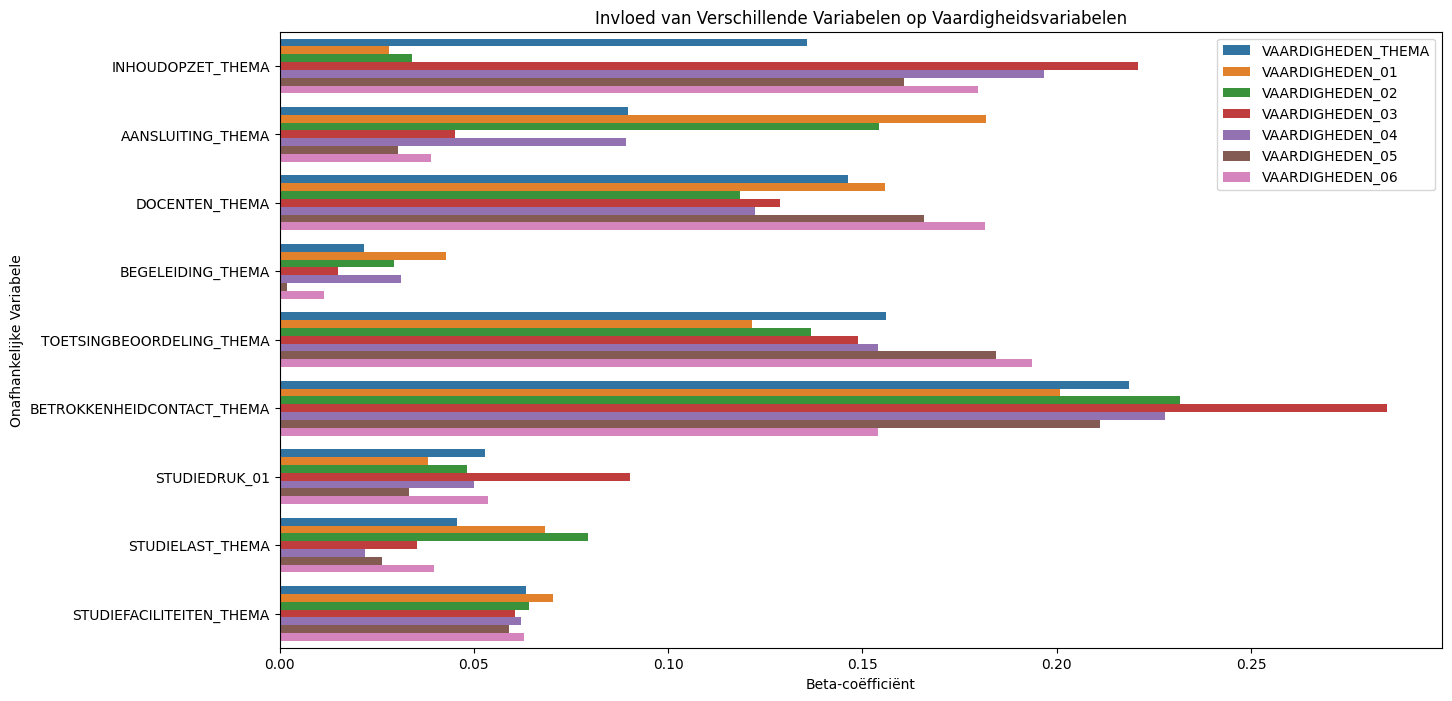

In [19]:
# Selecteer de tevredenheidsvariabelen

column_mapping = {
    'VAARDIGHEDEN_THEMA': 'Themascore Algemene vaardigheden',
    'VAARDIGHEDEN_01': 'Samenwerken met anderen',
    'VAARDIGHEDEN_02': 'Communicatieve vaardigheden',
    'VAARDIGHEDEN_03': 'Het aanleren van een kritische houding',
    'VAARDIGHEDEN_04': 'Probleemoplossend vermogen',
    'VAARDIGHEDEN_05': 'Het onderbouwen van conclusies',
    'VAARDIGHEDEN_06': 'Argumenteren/redeneren'
}

# Selecteer de tevredenheidsvariabelen met duidelijkere namen
vaardigheden_columns = list(column_mapping.keys())

onafhankelijke_variabelen = [
    'INHOUDOPZET_THEMA', 'AANSLUITING_THEMA', 'DOCENTEN_THEMA', 'BEGELEIDING_THEMA', 
    'TOETSINGBEOORDELING_THEMA', 'BETROKKENHEIDCONTACT_THEMA', 'STUDIEDRUK_01', 
    'STUDIELAST_THEMA', 'STUDIEFACILITEITEN_THEMA'
]

# Resultaten opslaan
regressie_resultaten = []

# Voer regressieanalyse uit voor elke vaardigheidsvariabele
for column in vaardigheden_columns:
    X = df_imputed[onafhankelijke_variabelen]
    y = df_imputed[column]
    
    # Voeg een constante toe aan het model (intercept)
    X = sm.add_constant(X)
    
    # Voer de regressieanalyse uit
    model = sm.OLS(y, X).fit()
    
    # Voeg de resultaten toe aan de lijst
    for var in onafhankelijke_variabelen:
        regressie_resultaten.append((column, var, model.rsquared, model.params[var], model.pvalues[var]))

# Resultaten omzetten naar een DataFrame voor overzichtelijkheid
resultaten_df = pd.DataFrame(regressie_resultaten, columns=['Vaardigheidsvariabele', 'Onafhankelijke Variabele', 'R-kwadraat', 'Beta-coëfficiënt', 'p-waarde'])

# Toon de resultaten
print(resultaten_df)

# Visualiseer de beta-coëfficiënten van de regressieanalyse
plt.figure(figsize=(15, 8))
sns.barplot(x='Beta-coëfficiënt', y='Onafhankelijke Variabele', hue='Vaardigheidsvariabele', data=resultaten_df)
plt.title('Invloed van Verschillende Variabelen op Vaardigheidsvariabelen')
plt.xlabel('Beta-coëfficiënt')
plt.ylabel('Onafhankelijke Variabele')
plt.legend(loc='best')
plt.show()

Feature ranking voor vaardigheden variabele:
1. feature BETROKKENHEIDCONTACT_THEMA (0.32779341309137183)
2. feature INHOUDOPZET_THEMA (0.1625283311390016)
3. feature DOCENTEN_THEMA (0.12725616819690888)
4. feature TOETSINGBEOORDELING_THEMA (0.11252617926817296)
5. feature STUDIELAST_THEMA (0.080094684965589)
6. feature STUDIEFACILITEITEN_THEMA (0.06442933004404865)
7. feature AANSLUITING_THEMA (0.06218244877834142)
8. feature BEGELEIDING_THEMA (0.0451262607242211)
9. feature STUDIEDRUK_01 (0.018063183792344648)


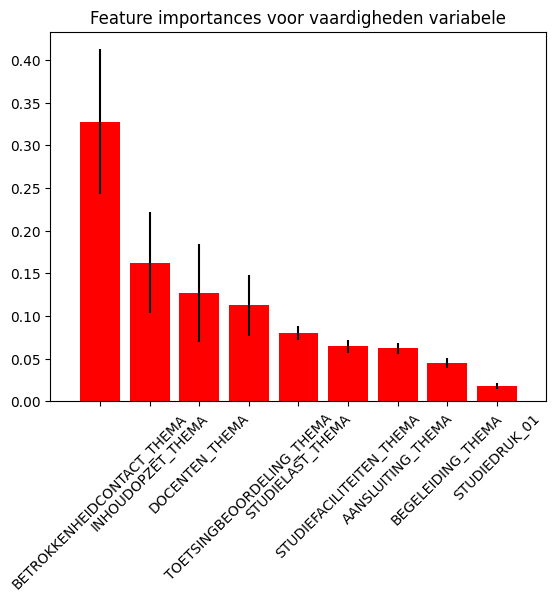

In [20]:
target = 'VAARDIGHEDEN_THEMA'

X = df_imputed[onafhankelijke_variabelen]
y = df_imputed[target]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train het Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Bereken feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print de feature ranking
print("Feature ranking voor vaardigheden variabele:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {onafhankelijke_variabelen[indices[f]]} ({importances[indices[f]]})")

# Plot de feature importances
plt.figure()
plt.title("Feature importances voor vaardigheden variabele")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [onafhankelijke_variabelen[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

# Data preparatie (Dimensie reductie, normalisatie en outliers verwijderen)

PCA (Principale Componenten Analyse) is een statistische techniek die wordt gebruikt om de dimensionaliteit van een dataset te verminderen. Het identificeert de belangrijkste variaties in de data door nieuwe, ongecorreleerde variabelen te creëren, genaamd hoofdcomponenten, die een groot deel van de variatie in de originele dataset verklaren. Deze hoofdcomponenten zijn lineaire combinaties van de oorspronkelijke variabelen en worden gerangschikt op basis van de hoeveelheid variatie die ze verklaren. Door alleen de eerste paar hoofdcomponenten te gebruiken, kan PCA de complexiteit van de data verminderen terwijl de belangrijkste informatie behouden blijft.

Bron: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Dimensiereductie helpt bij het vereenvoudigen van complexe datasets door het aantal variabelen te verminderen, wat leidt tot snellere en efficiëntere modellen. Het vermindert het risico op overfitting door irrelevante of redundante features te elimineren. Hierdoor wordt de interpretatie en visualisatie van data eenvoudiger. Bovendien verlaagt het de computationele kosten en maakt het de verwerking van de data minder resource-intensief. Uiteindelijk kan het de prestaties en generaliseerbaarheid van machine learning modellen verbeteren. Voor deze reden is er deze week gekozen dimensie reductie toe te passen ter voorbereiding van de dataset.

Daarnaast is ter voorbereiding van de dataset de dataset genormaliseerd om ervoor te zorgen dat alle variabelen evenveel bijdragen aan de analyse, ongeacht hun oorspronkelijke schaal of eenheden. Dit voorkomt dat variabelen met grotere waarden domineren.

Ten slotte zij ter voorbereiding van de dataset de outliers verwijdert. De drempelwaarde hiervan is minimaal behouden vanwege de grootte van de dataset (1073 regels). Een Z-score drempelwaarde van 7 impliceert dat alleen data punten die meer dan 7 standaarddeviaties van het gemiddelde afwijken als outliers worden beschouwd. Dit betekent dus dat slechts zeer extreme waarden worden als outliers beschouwd en verwijderd, wat betekent dat de meeste data punten in de dataset behouden blijven.


In [ ]:
def remove_outliers(scaled_data):
    # IsolationForest model for outlier detection
    iso = IsolationForest(contamination=0.05)  # Adjust the contamination as necessary
    yhat = iso.fit_predict(scaled_data)
    
    # Select all rows that are not outliers
    mask = yhat != -1
    scaled_data_no_outliers = scaled_data[mask]
    
    return scaled_data_no_outliers

def process_pca(df, explained_variance_threshold=0.95):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    # Outlier removal on scaled data
    scaled_data_no_outliers = remove_outliers(scaled_data)
    
    pca = PCA()
    pca_result = pca.fit(scaled_data_no_outliers)
    
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
    
    pca = PCA(n_components=n_components)
    pca_df = pd.DataFrame(pca.fit_transform(scaled_data_no_outliers))
    
    return pca_df, cumulative_variance, n_components, scaled_data_no_outliers, pca_result

## Optimale PCA hoeveelheid berekening en visualisatie.

De te gebruiken PCA's behoren 90% van de variantie te verklaren. Om te achterhalen hoeveel PCA-componenten nodig zijn om 90% van de variantie te verklaren is de volgende code toegepast:

         0         1         2         3         4         5         6   \
0 -2.424816  0.590222 -1.648330  2.305818  0.320022 -1.364703  1.912779   
1 -6.701372 -0.042280 -0.305675  0.904632 -2.655015 -0.065339  0.102823   
2  0.489431  2.382302 -0.102092  1.747559  0.496962 -0.097376  0.850296   
3  2.212365  2.121960 -1.269863  1.730312  1.204894 -0.589104  0.455086   
4 -0.254938  0.529606 -4.268884  1.070168 -0.714385 -0.765622  6.209224   

         7         8         9   ...        81        82        83        84  \
0  0.404903  0.500875  0.197812  ... -0.053998 -0.885129 -0.096474 -0.934317   
1 -2.870902  0.318106 -1.019297  ... -0.086002 -0.416784  1.272423 -0.816254   
2 -1.345310  0.080252 -1.058013  ...  0.237108  0.265795 -0.377757  0.278453   
3 -1.627633 -0.318287 -1.054157  ...  0.729612 -0.680120  0.398769  0.536479   
4 -3.046446 -0.921656 -3.241925  ...  1.069067  0.517166 -0.094803  0.231360   

         85        86        87        88        89        90  
0  0

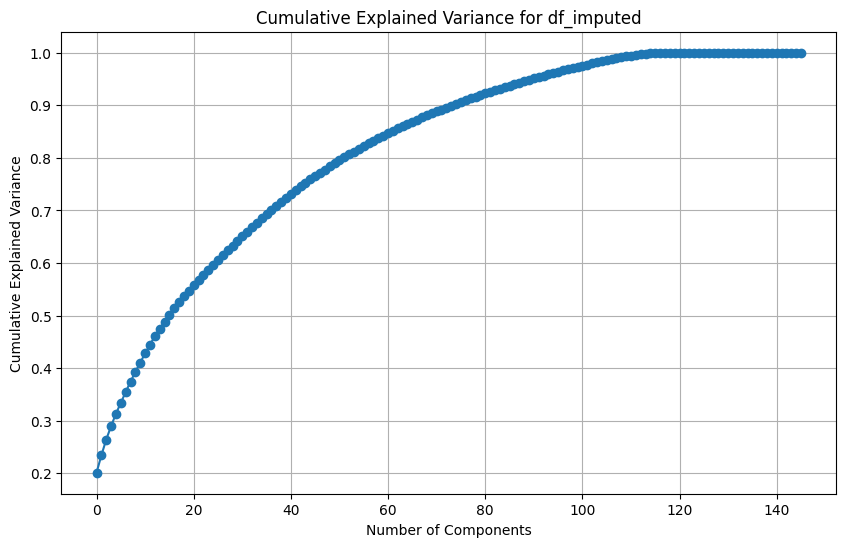

In [ ]:
# Run PCA op df_imputed
pca_df_imputed, cumulative_variance_imputed, n_components_imputed, scaled_data_imputed, pca_result_imputed = process_pca(df_imputed)

if pca_df_imputed is not None:
    print(pca_df_imputed.head())
    print(f'Number of components selected for df_imputed: {n_components_imputed}')

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance_imputed, marker='o')
    plt.title('Cumulative Explained Variance for df_imputed')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

**Observaties:**

*   Om 90% van de variantie te verklaren is ongeveer 70 PCA-componenten nodig.

De code hieronder zal controleren of de PCA-componenten enkel uit integers bestaat zoals dat zonder dimensie reductie ook is.

In [ ]:
# Weergeven data types van de kolommen
print("Data Types:")
print(pca_df_imputed.dtypes)

Data Types:
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
86    float64
87    float64
88    float64
89    float64
90    float64
Length: 91, dtype: object


**Observaties:**

*   De code bestaat nog steeds volledig uit integers.

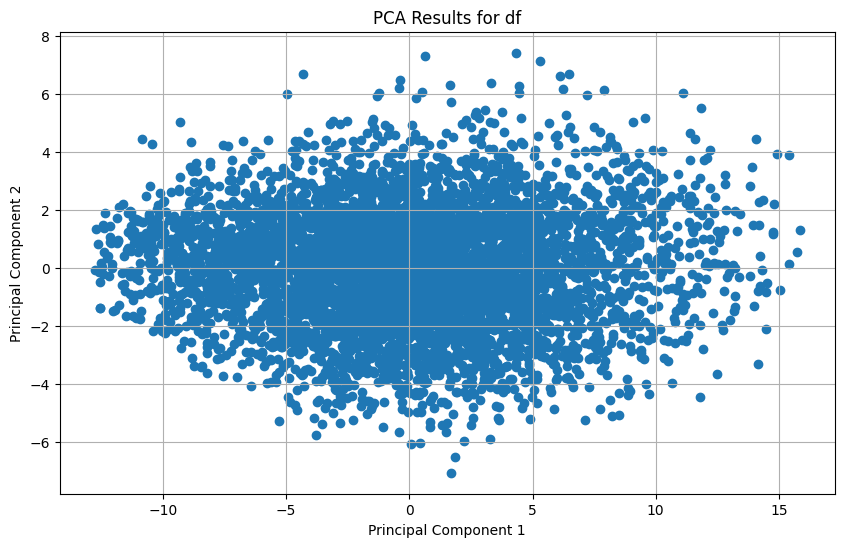

In [ ]:
if n_components_imputed >= 2:  # Controleer of er minstens 2 componenten zijn
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_df_imputed.iloc[:, 0], pca_df_imputed.iloc[:, 1])
    plt.title('PCA Results for df')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
else:
    print("Not enough components to plot PCA1 vs PCA2")

**Observaties:**

*   De meeste datapunten zijn geconcentreerd rond het centrum van de plot, wat suggereert dat de meeste variatie in de data binnen een redelijk klein bereik van de eerste en tweede hoofcomponent valt.
*   De spreiding langs de x-as (Principal Component 1) en y-as (Principal Component 2) is redelijk gelijkmatig verdeeld. Er zijn nog enkele uitschieters aanwezig, maar minder dan als de outliers niet verwijderd werden.
*   De eerste hoofcomponent (Principal Component 1) bevat de meeste variatie.

De volgende code genereert een dataset met vier willekeurige kenmerken, voert PCA uit op deze dataset en visualiseert vervolgens de data in drie verschillende stadia: de originele, genormaliseerde (gestandaardiseerde) en PCA-getransformeerde data. Het doel hiervan is om te laten zien hoe de data verandert door de stappen van normalisatie en PCA, en om de effectiviteit van PCA in het reduceren van dimensionaliteit en het behoud van variatie te illustreren. De visualisatie helpt bij het begrijpen van de impact van elke stap op de data en de interpretatie van de PCA-resultaten.

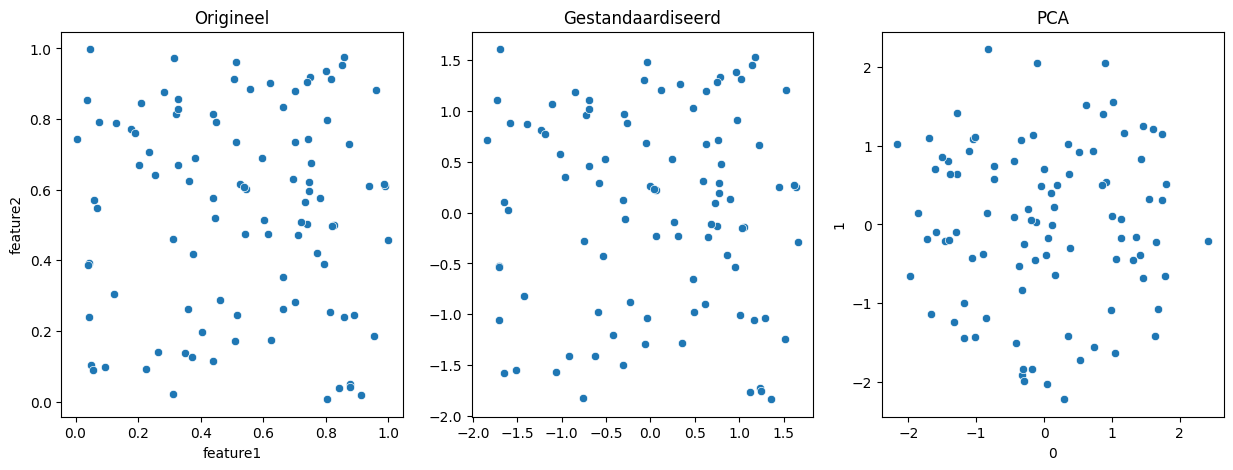

In [ ]:
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100)
}
df_imputed = pd.DataFrame(data)

# Run PCA op df_imputed
pca_df_imputed, cumulative_variance_imputed, n_components_imputed, scaled_data_imputed, pca_result_imputed = process_pca(df_imputed)

# Visualiseren van de originele, genormaliseerde en PCA getransformeerde data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Voor visualisatie selecteren we willekeurige kenmerken
random_features = df_imputed.columns[:2]

sns.scatterplot(ax=axes[0], x=df_imputed[random_features[0]], y=df_imputed[random_features[1]])
axes[0].set_title('Origineel')

sns.scatterplot(ax=axes[1], x=scaled_data_imputed[:, df_imputed.columns.get_loc(random_features[0])], y=scaled_data_imputed[:, df_imputed.columns.get_loc(random_features[1])])
axes[1].set_title('Gestandaardiseerd')

if n_components_imputed >= 2:
    sns.scatterplot(ax=axes[2], x=pca_df_imputed.iloc[:, 0], y=pca_df_imputed.iloc[:, 1])
    axes[2].set_title('PCA')
else:
    axes[2].set_title('PCA (not enough components)')

plt.show()

**Observaties:**

*Originele Data:*

*   De originele data heeft waarden tussen 0 en 1 voor zowel feature1 als feature2, wat typisch is voor gegevens die willekeurig zijn gegenereerd met np.random.rand.
*   De punten zijn gelijkmatig verspreid zonder duidelijke clustering.

*Genormaliseerde Data:*

*   Na normalisatie zijn de waarden van feature1 en feature2 omgezet zodat ze een gemiddelde van 0 en een standaardafwijking van 1 hebben.
*   De spreiding van de data is veranderd, maar de relatieve posities van de punten blijven hetzelfde. De data is nu gecentreerd rond (0, 0).

*PCA-getransformeerde Data:*

*   De PCA-transformatie heeft de data opnieuw geschaald en gedraaid om de maximale variatie te vangen in de eerste componenten.
*   De waarden van de data variëren nu rond 0 met een andere spreiding in vergelijking met de genormaliseerde data.
*   Het lijkt erop dat de relatieve structuur van de data behouden blijft, maar is aangepast om de variatie in de richting van de hoofcomponenten beter te representeren.

Om het even terug te nemen naar de matrix visualisatie voor random features, hier worden deze weergegeven mét de speciale uitlijning voor "TEVREDENHEIDALGEMEEN_01". 
Deze visualisaties helpen bij het begrijpen van de basisverdeling en relaties tussen de kenmerken, evenals hoe de categorieën van tevredenheid zich verhouden tot deze kenmerken. Dit kan nuttig zijn bij het bepalen of aanvullende of andere kenmerken nodig zijn om een duidelijkere scheiding tussen de tevredenheidscategorieën te bereiken.

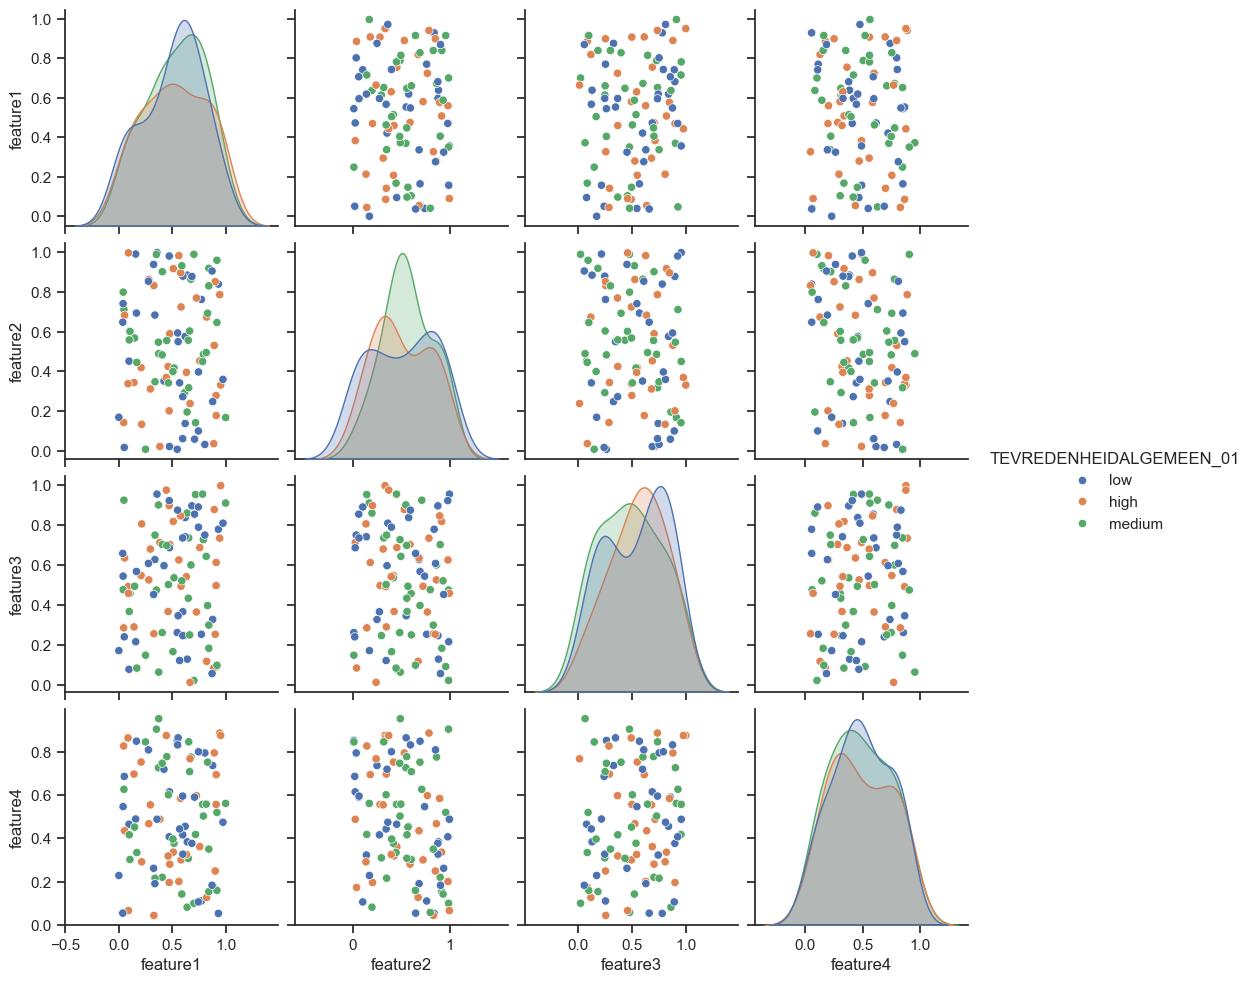

In [ ]:
# Gegevens genereren
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'TEVREDENHEIDALGEMEEN_01': np.random.choice(['low', 'medium', 'high'], 100)  # Dummy categorische data voor hue
}
df_imputed = pd.DataFrame(data)

# Pairplot met 'TEVREDENHEIDALGEMEEN_01' als kleur
sns.set_theme(style="ticks")
sns.pairplot(df_imputed.select_dtypes(include=[np.number]).assign(TEVREDENHEIDALGEMEEN_01=df_imputed['TEVREDENHEIDALGEMEEN_01']), hue='TEVREDENHEIDALGEMEEN_01')
plt.show()

**Observaties:**

*Verdelingen per Kenmerk:*

*   Elke diagonaal plot toont de verdeling van een individueel kenmerk voor de drie categorieën van tevredenheid (low, medium, high).
*   De verdelingen lijken redelijk gelijkmatig te zijn voor elk kenmerk, hoewel er enkele verschillen zijn tussen de categorieën. Bijvoorbeeld, de verdelingen van feature1, feature2, en feature3 vertonen enige variatie tussen de tevredenheidscategorieën.

*Relaties Tussen Kenmerken:*

*   De scatterplots tonen de relaties tussen elk paar kenmerken, gekleurd op basis van de tevredenheidscategorie.
*   Er is geen duidelijke correlatie zichtbaar tussen de kenmerken op basis van de spreiding van de punten in de scatterplots. De punten lijken willekeurig verspreid, wat suggereert dat de kenmerken mogelijk niet sterk gecorreleerd zijn.

*Categorieën van Tevredenheid:*

*   De kleuren (blauw voor "low", oranje voor "high", groen voor "medium") helpen bij het identificeren van de verspreiding van tevredenheidscategorieën binnen de dataset.
*   Er is geen duidelijke scheiding of clustering van de tevredenheidscategorieën in de scatterplots, wat aangeeft dat de tevredenheid mogelijk niet sterk afhankelijk is van de waarden van deze specifieke kenmerken.

*Overlapping van Categorieën:*

*   Er is aanzienlijke overlap tussen de tevredenheidscategorieën in zowel de verdelingsplots als de scatterplots. Dit suggereert dat de kenmerken mogelijk niet voldoende discriminatief zijn om de verschillende niveaus van tevredenheid goed te scheiden.

Vervolgens zijn nog twee codeblocks uit het Jupyter Notebook van discussiecollege 2 toegepast om het verschil tussen de originele data, de gestandaardiseerde data en de PCA data te onderscheiden. De code is aangepast op de data van de OU, maar de code zelf is dus van het discussiecollege 2 van Data Science (gebruikt random features).

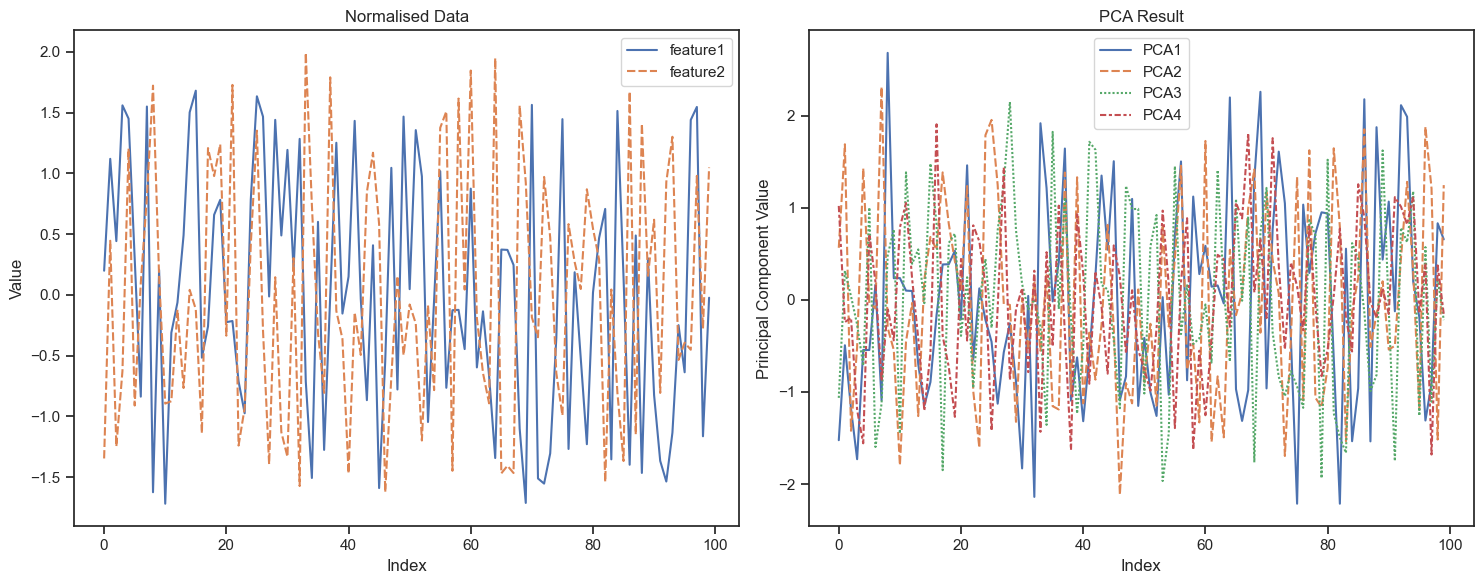

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gebruikt genormaliseerde data en PCA resultaten
std_df = pd.DataFrame(scaled_data_imputed, columns=df_imputed.select_dtypes(include=[np.number]).columns)
pca_df = pd.DataFrame(pca_result_imputed.transform(scaled_data_imputed), columns=[f"PCA{i+1}" for i in range(n_components_imputed)])

# Willekeurige kenmerken selecteren voor visualisatie
random_features = np.random.choice(std_df.columns, size=2, replace=False)

# Lijnplot van twee genormaliseerde kolommen
sns.lineplot(ax=axes[0], data=std_df[random_features])
axes[0].set_title('Normalised Data')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')

# Lijnplot van PCA resultaten
sns.lineplot(ax=axes[1], data=pca_df)
axes[1].set_title('PCA Result')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Principal Component Value')

plt.tight_layout()
plt.show()

**Observaties:**
*Genormaliseerde Data (Linker Plot):*

*   De linker plot toont de waarden van de genormaliseerde data voor twee kenmerken (feature1 en feature2) over de index.
*   De genormaliseerde data heeft waarden gecentreerd rond 0, met een standaardafwijking van 1. Dit is zichtbaar aan de variatie tussen ongeveer -2 en 2.

*PCA-resultaten (Rechter Plot):*

*   De rechter plot toont de waarden van de eerste vier hoofcomponenten na PCA-transformatie over dezelfde index.
*   PCA1 (de eerste hoofcomponent) lijkt de meeste variatie te bevatten, wat te zien is aan de grotere fluctuaties in vergelijking met de andere componenten.
*   PCA2, PCA3 en PCA4 tonen minder variatie, wat suggereert dat deze componenten minder belangrijk zijn in het verklaren van de variatie in de data.

*Vergelijking tussen Genormaliseerde Data en PCA:*

*   De genormaliseerde data toont de oorspronkelijke kenmerken, die mogelijk gecorreleerd zijn. De PCA-transformatie herschaalt en roteert de data zodanig dat de nieuwe kenmerken (hoofcomponenten) orthogonaal zijn en de belangrijkste variaties in de data vangen.
*   De eerste hoofcomponent (PCA1) bevat de grootste variatie in de data, terwijl de volgende componenten successief minder variatie bevatten.

*Dimensionaliteit Reductie:*

*   Door de data te transformeren naar PCA-componenten, kan men de meest significante patronen in de data identificeren. Dit kan nuttig zijn voor verdere analyse, modellering, en visualisatie, omdat het de data reduceert tot de meest informatieve componenten.

> Zoals bij de cumulatieve verklaarde variantie werd aangetoond, verklaart elke PCA-component dat elkaar opvolgt steeds minder variantie van de dataset.

Ten slotte is er nog extra visualisatie naar de verschillende PCA's voor beide datasets uitgevoerd en een clusteranalyse per dataset voor de PCA"s.

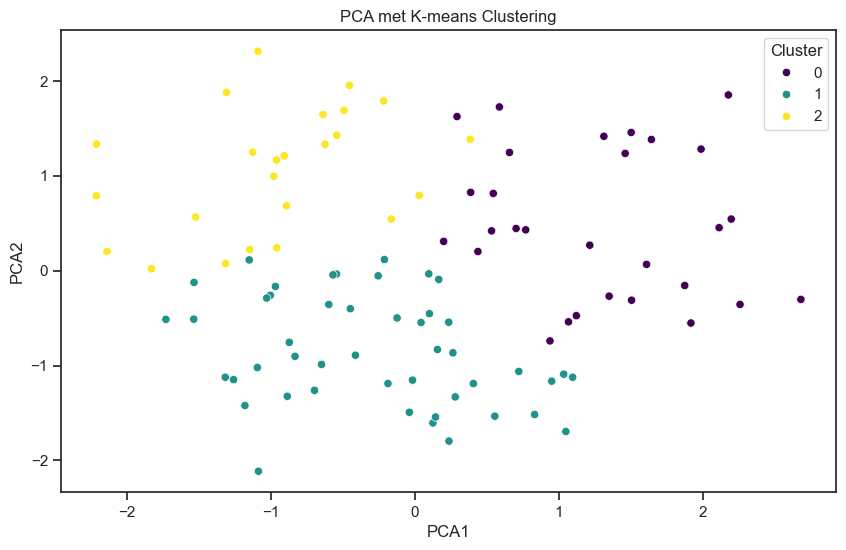

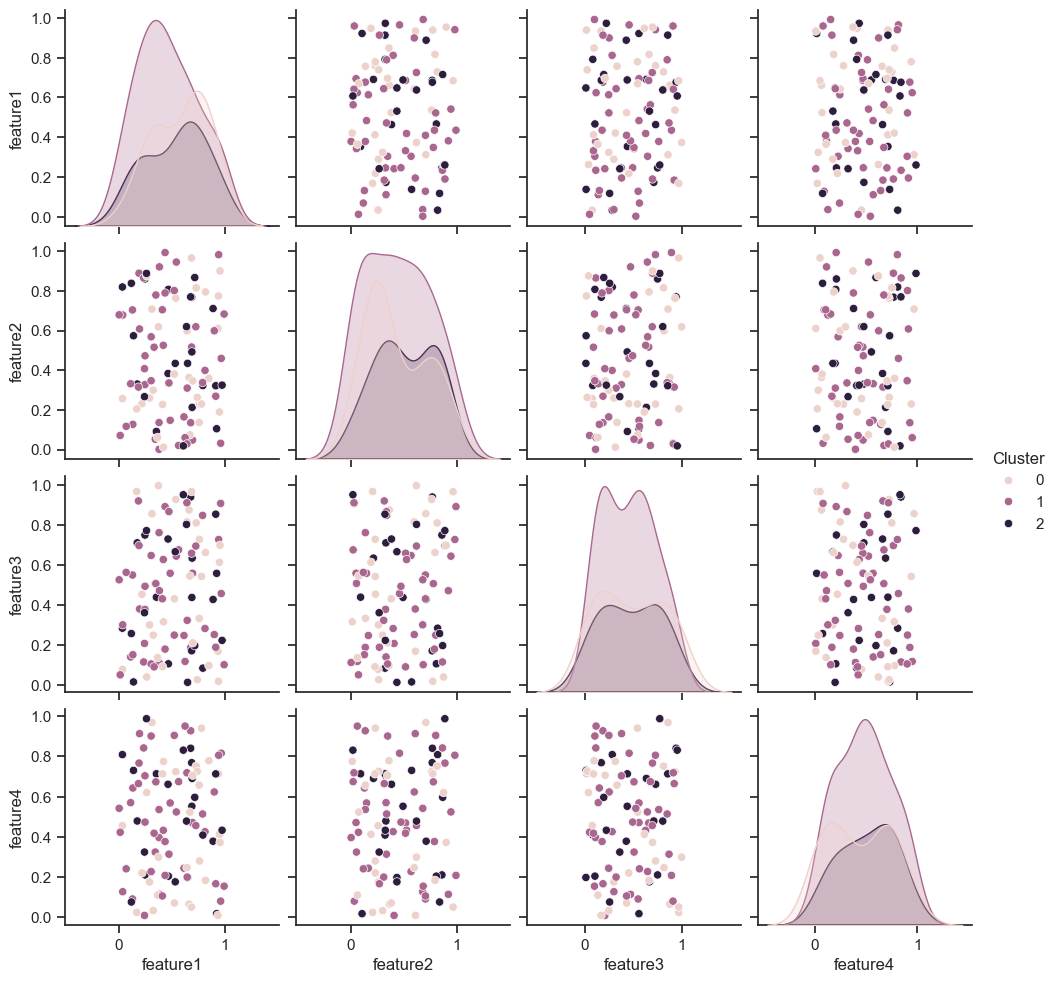

In [ ]:
# Clusteranalyse met k-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Voeg de clusters toe aan de PCA DataFrame voor visualisatie
pca_df['Cluster'] = clusters
df_imputed['Cluster'] = clusters

# Visualisatie van de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df.iloc[:, 0], y=pca_df.iloc[:, 1], hue=pca_df['Cluster'], palette='viridis')
plt.title('PCA met K-means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Pairplot met clusters
sns.set_theme(style="ticks")
sns.pairplot(df_imputed.select_dtypes(include=[np.number]).assign(Cluster=df_imputed['Cluster']), hue='Cluster')
plt.show()

**Observaties:**

*Clusters:*
*   De data is ingedeeld in drie clusters, aangeduid met de labels 0, 1, en 2. Deze clusters zijn weergegeven met verschillende kleuren (lichtroze, donkerroze, en paars). Het lichtroze lijkt ook op beige.
*   De verdelingen van de clusters zijn weergegeven in de diagonaalplots, en de spreiding tussen de clusters is zichtbaar in de scatterplots.

*Verdeling per Cluster:*

*   De verdelingsplots op de diagonalen tonen hoe de kenmerken verdeeld zijn binnen elk cluster. Elk cluster heeft zijn eigen kenmerkende verdeling, wat suggereert dat de clusters verschillende eigenschappen hebben.
*   Bijvoorbeeld, voor feature1 en feature2 zijn de verdelingen van cluster 0 en cluster 1 redelijk gelijkmatig, terwijl cluster 2 een meer geconcentreerde verdeling heeft.

*Relaties Tussen Kenmerken:*

*   De scatterplots tonen de relaties tussen elk paar kenmerken, met de clusters weergegeven in verschillende kleuren.
*   Er lijkt enige overlapping tussen de clusters te zijn, maar er zijn ook duidelijke scheidingen zichtbaar, vooral tussen cluster 0 en de andere clusters in verschillende kenmerkcombinaties.

*Interpretatie van Clustering op PCA-Data:*

*   De clustering op PCA-getransformeerde data geeft aan dat er latente patronen of groepen in de data zijn die worden benadrukt door de PCA.
*   De clusters kunnen worden geïnterpreteerd als groepen van observaties die meer op elkaar lijken in de ruimte van de hoofcomponenten, wat kan helpen bij het begrijpen van de onderliggende structuur van de data.

*Gebruik van PCA bij Clustering:*

*   Het gebruik van PCA voor clustering helpt bij het reduceren van de dimensionaliteit en bij het identificeren van de belangrijkste kenmerken die bijdragen aan de variatie in de data. Dit maakt het eenvoudiger om duidelijke clusters te identificeren.
*   PCA vermindert ruis en irrelevante variatie, waardoor de clustering algoritmes beter presteren.


Deze analyse laat zien dat de PCA-getransformeerde data duidelijke clusters vertoont, wat kan helpen bij verdere analyse en interpretatie van de dataset. Het geeft inzicht in de onderliggende structuren en patronen die anders moeilijk te identificeren zouden zijn in de oorspronkelijke hoge-dimensionale ruimte.